In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 01. 데이터 확인

In [4]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
# 컬럼별 null data % 출력
# {:>10} 오른쪽 정렬
for col in df.columns:
    msg = 'column : {:>10}\t Percent of Nan value : {:2f}%'.format(col, (df[col].isnull().sum() / df[col].shape[0])* 100)
    print(msg)

column : PassengerId	 Percent of Nan value : 0.000000%
column :   Survived	 Percent of Nan value : 0.000000%
column :     Pclass	 Percent of Nan value : 0.000000%
column :       Name	 Percent of Nan value : 0.000000%
column :        Sex	 Percent of Nan value : 0.000000%
column :        Age	 Percent of Nan value : 19.865320%
column :      SibSp	 Percent of Nan value : 0.000000%
column :      Parch	 Percent of Nan value : 0.000000%
column :     Ticket	 Percent of Nan value : 0.000000%
column :       Fare	 Percent of Nan value : 0.000000%
column :      Cabin	 Percent of Nan value : 77.104377%
column :   Embarked	 Percent of Nan value : 0.224467%


- Age, Cabin 컬럼에서 Null값이 많다.

### 02. 전체 생존확률 확인

Text(0.5, 1.0, 'Survived')

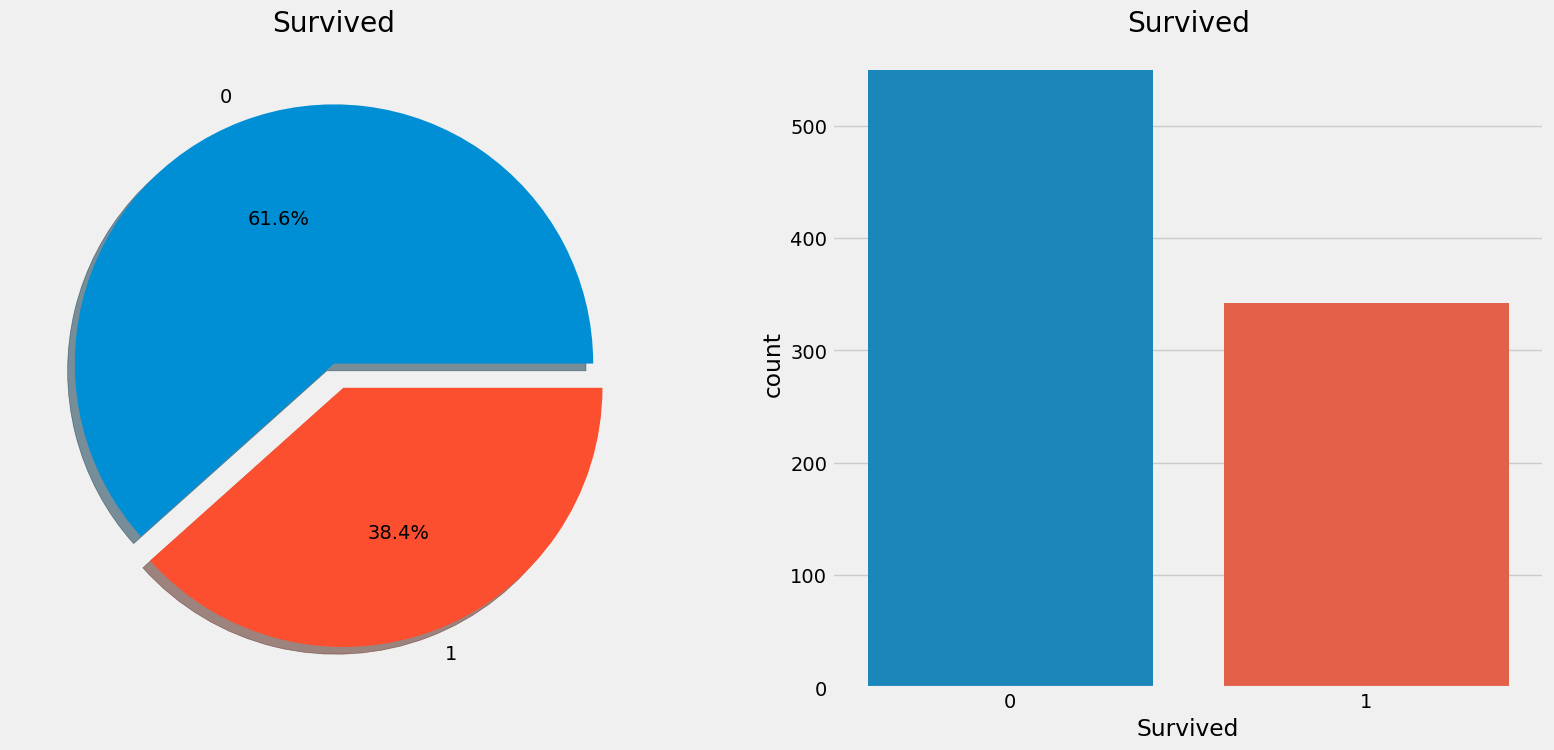

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct ='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df, ax=ax[1])
ax[1].set_title('Survived')

- 생존한 사람 38.4%, 생존하지 못한 사람 61.6%로 생존하지 못한 사람의 비율이 더 높다.

In [13]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### 0.3 각 컬럼별 생존 비율 확인하기

- Type of Features
    - Categorical Features : 두 개 이상의 범주를 가지며 해당 특성의 값이 그 범주로 분류될 수 있는 변수를 의미, 순서가 정해져있지 않다.
        eg. Sex, Embarked
    - Ordinal Features : 상대적인 순서나 정렬을 가질 수 있다. eg. Pclass
    - Continuous Feature : 해당 특성의 열에서 최솟값과 최댓값 사이, 어떤 두 점 사이 값들을 가질 수 있는 경우
        eg. Age

#### 03-01. 성별에 따른 생존 비율 확인(Categorical Feature)
- Sex로 groupby된 Sex, Survived 데이터로 막대 그래프 그리기
- 성별 Survived여부에 따른 막대그래프 그리기

In [14]:
# 데이터 프레임으로 성별 생존 확률 확인하기
df[['Survived', 'Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [15]:
# Cross tab으로 성별 생존여부 확인하기
pd.crosstab(df['Survived'], df['Sex']).style.background_gradient('summer_r')

Sex,female,male
Survived,,
0,81,468
1,233,109


Text(0.5, 1.0, 'Sex:Survived vs Dead')

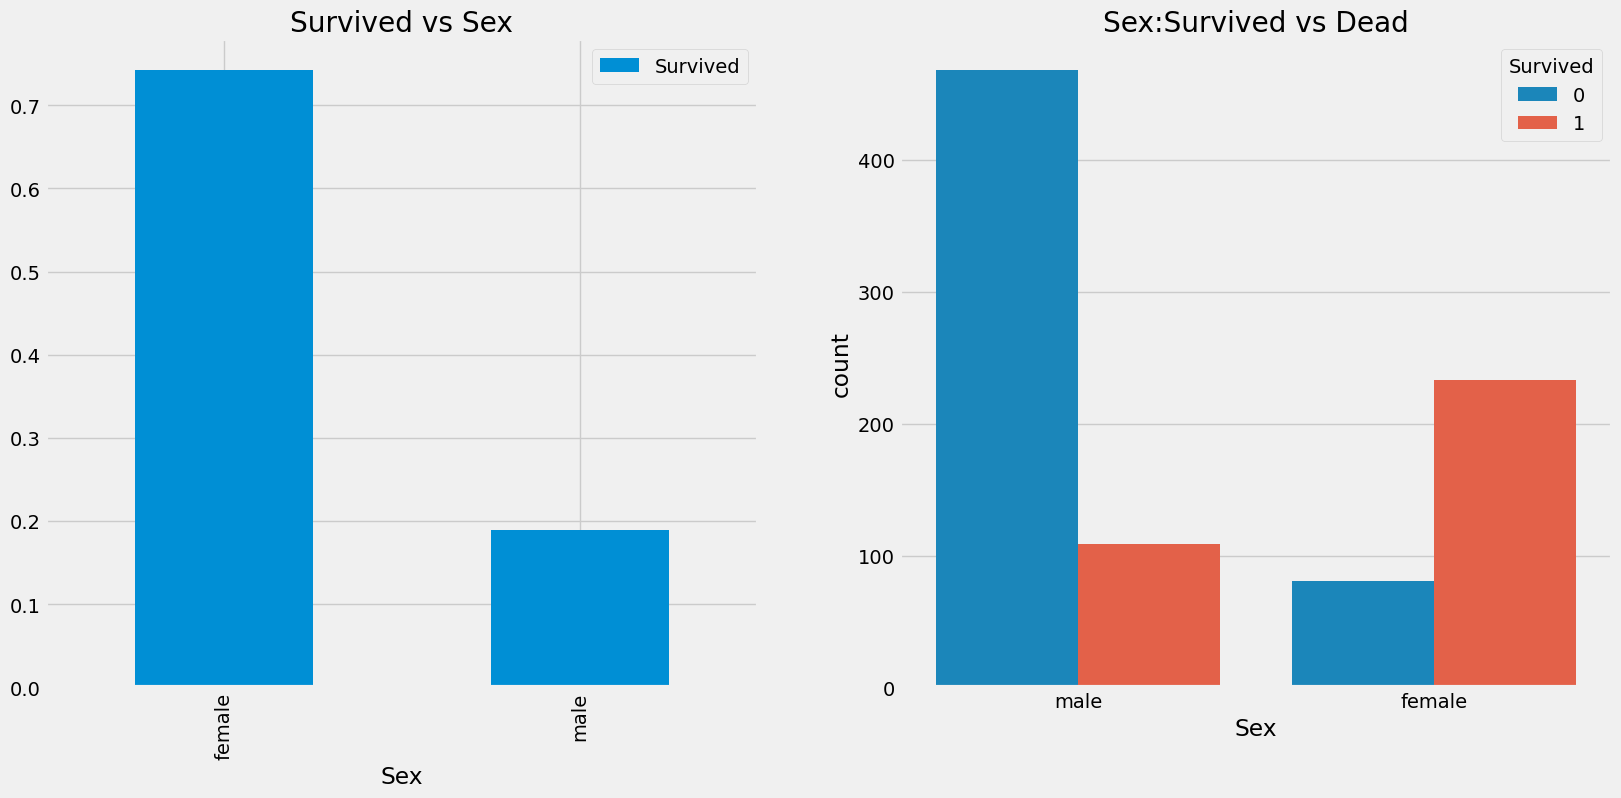

In [16]:
#막대그래프로 성별 생존여부 확인하기
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

- 여성 생존 확률이 남성 생존 확률보다 월등히 높다.

#### 03-02. Pclass에 따른 생존여부 확인하기(Ordinal Features)

In [17]:
#데이터 프레임으로 등급별 생존여부 확인
df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
# 데이터 프레임으로 생존 확률 확인하기
df[['Survived','Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [19]:
# Crosstab으로 확인
pd.crosstab(df['Pclass'], df['Survived']).style.background_gradient('summer_r')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0.5, 1.0, 'Pclass : Survived vs Dead')

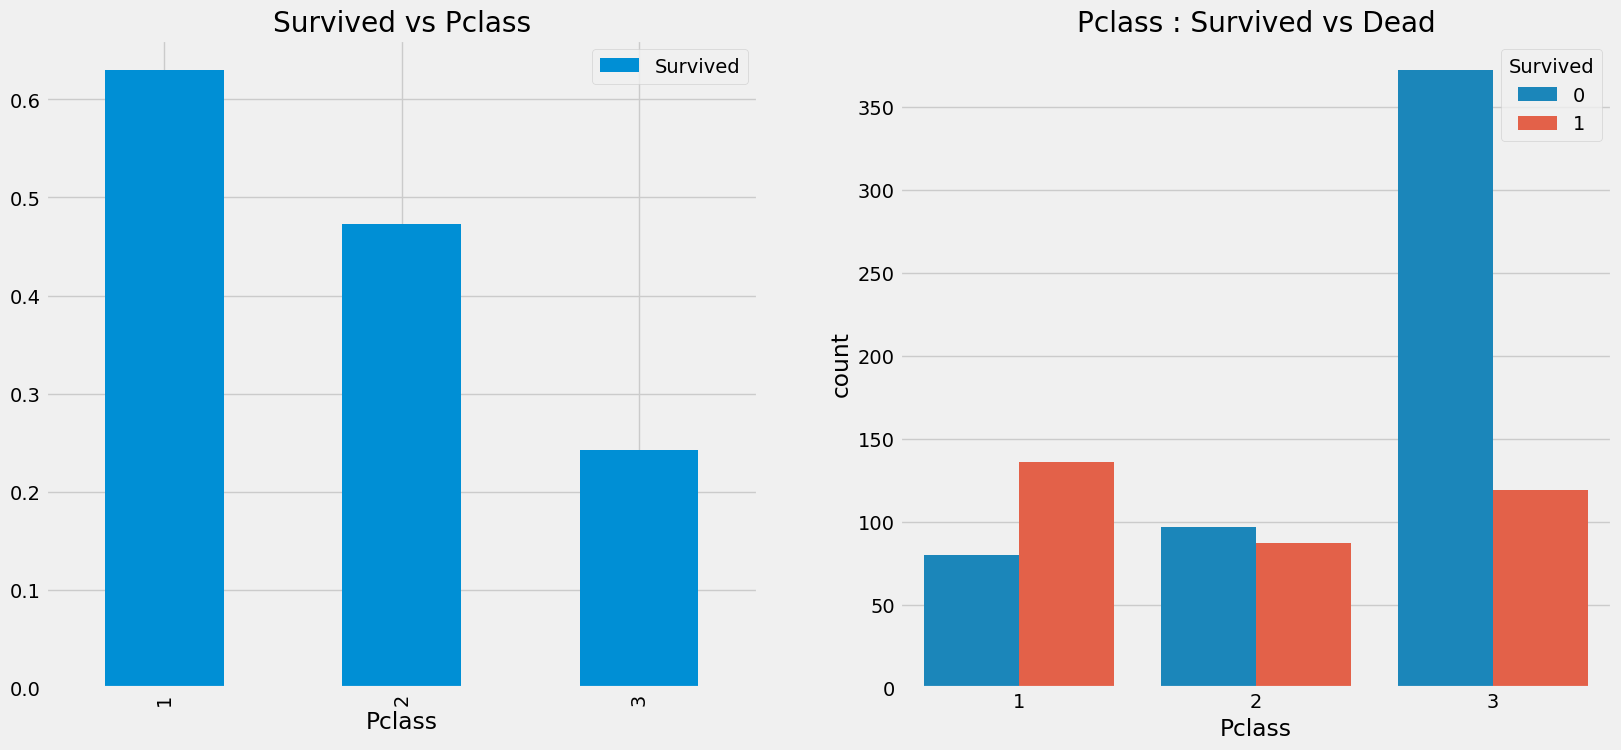

In [20]:
#막대그래프로 확인
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Pclass')
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Pclass : Survived vs Dead')

- 등급이 높을 수록 생존 확률이 높다.
- 3등급 탑승객 수가 제일 많지만 생존 확률이 가장 낮다.

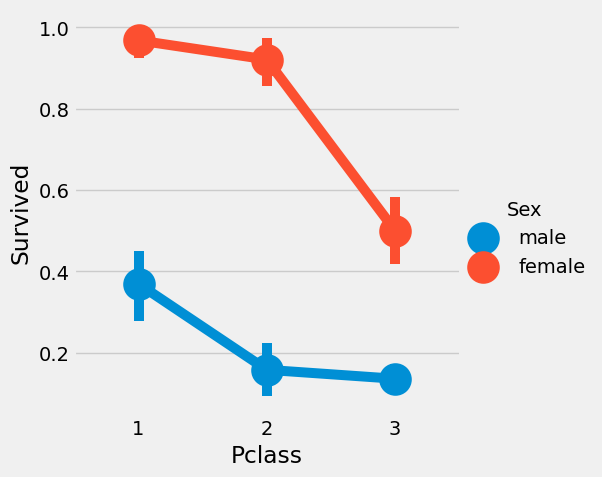

In [21]:
# catplot으로 등급별, 성별 생존 여부 확인
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')

- 성별 관계없이 1등급 탑승객의 생존 여부가 높고, 남성보다 여성의 생존 확률이 높다.

#### 03-03. Age에 따른 생존여부 확인하기(Continuous Features)

In [22]:
# 최연장, 최연소 탑승객 나이, 평균 나이 확인
print('The Oldest Passenger\'s age : {} Years'.format(df['Age'].max()))
print('The Youngest Passenger\'s age : {} Years'.format(df['Age'].min()))
print('The Average Age of All Passengers is : {:.1f} Years'.format(df['Age'].mean()))

The Oldest Passenger's age : 80.0 Years
The Youngest Passenger's age : 0.42 Years
The Average Age of All Passengers is : 29.7 Years


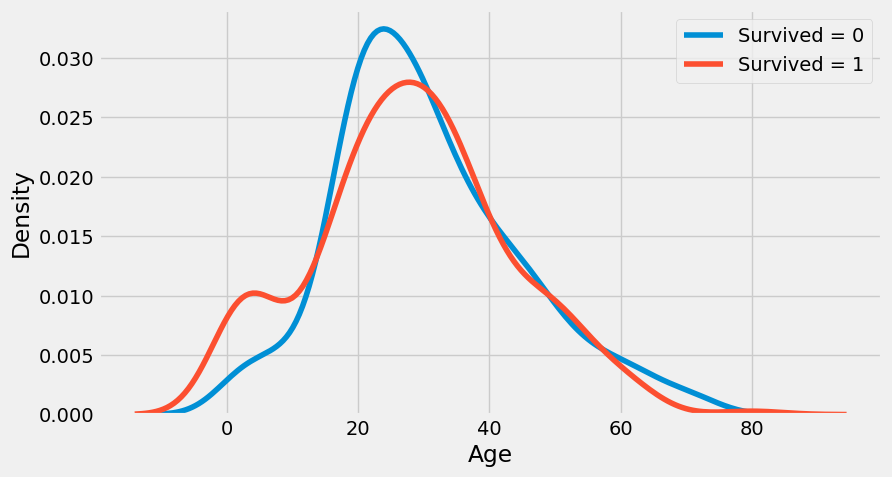

In [23]:
# kdeplot으로 나이 별 생존 여부 분포 확인
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['Survived']==0]['Age'], ax=ax)
sns.kdeplot(df[df['Survived']==1]['Age'], ax=ax)
plt.legend(['Survived = 0', 'Survived = 1'])
plt.show()

- 나이가 어린 탑승객의 생존 확률이 높다.

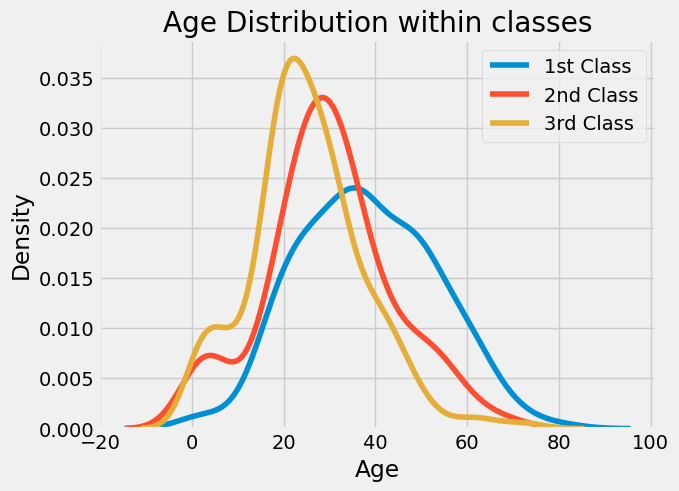

In [24]:
# Pclass 별 나이 분포 확인
sns.kdeplot(df[df['Pclass']==1]['Age'])
sns.kdeplot(df[df['Pclass']==2]['Age'])
sns.kdeplot(df[df['Pclass']==3]['Age'])
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- 2등급, 3등급에 어린이의 분포가 많음.
- 1등급에 나이 많은 탑승객의 비중이 크다.

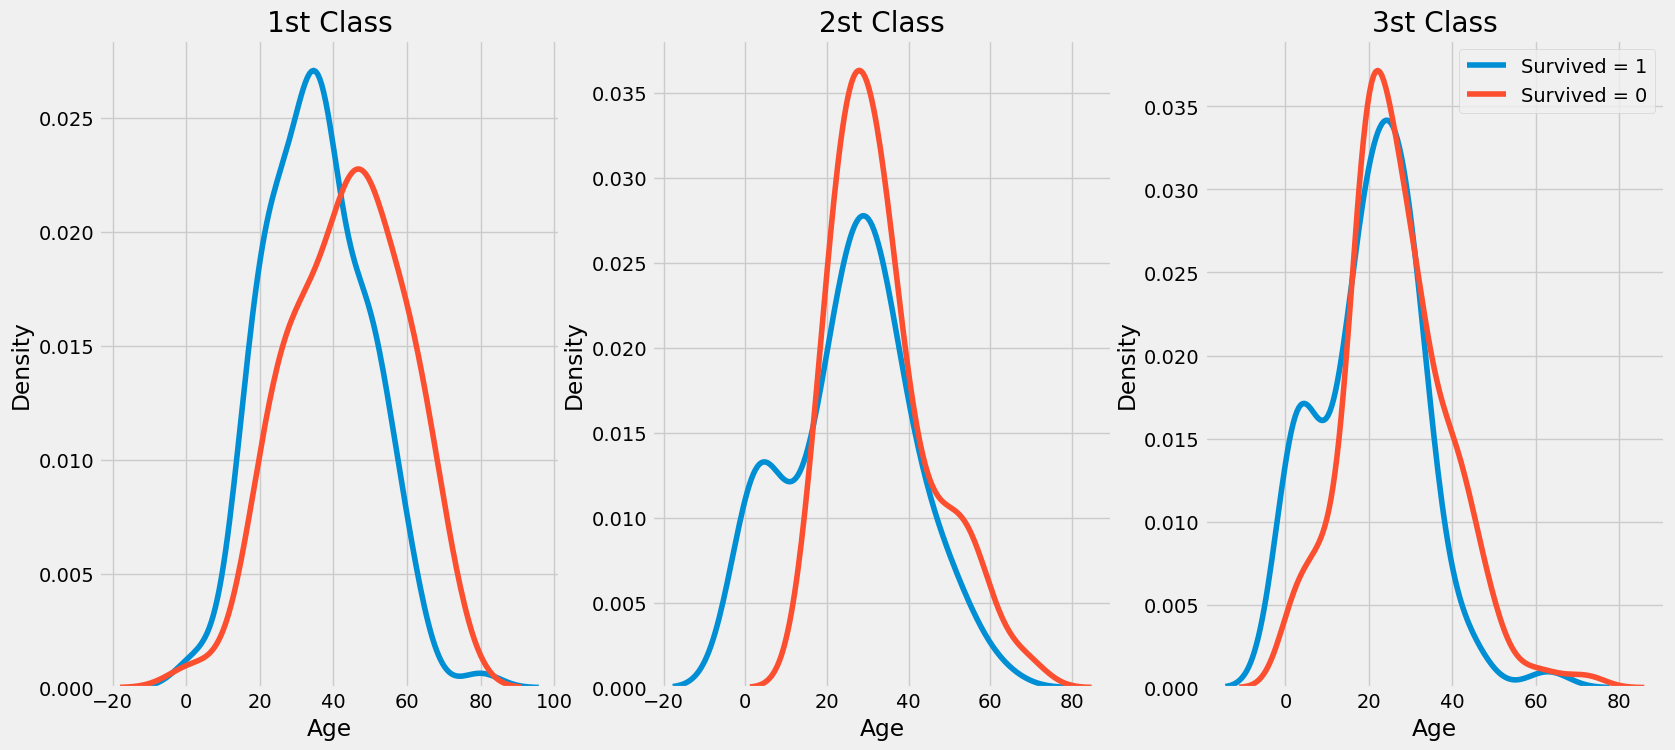

In [25]:
# 탑승 등급별, 나이별 생존 분포 확인 
f, ax = plt.subplots(1, 3, figsize=(18, 8))
sns.kdeplot(df[(df['Survived']==1) & (df['Pclass']==1)]['Age'], ax=ax[0])
sns.kdeplot(df[(df['Survived']==0) & (df['Pclass']==1)]['Age'], ax=ax[0])
ax[0].set_title('1st Class')

sns.kdeplot(df[(df['Survived']==1) & (df['Pclass']==2)]['Age'], ax=ax[1])
sns.kdeplot(df[(df['Survived']==0) & (df['Pclass']==2)]['Age'], ax=ax[1])
ax[1].set_title('2st Class')

sns.kdeplot(df[(df['Survived']==1) & (df['Pclass']==3)]['Age'], ax=ax[2])
sns.kdeplot(df[(df['Survived']==0) & (df['Pclass']==3)]['Age'], ax=ax[2])
ax[2].set_title('3st Class')
plt.legend(['Survived = 1', 'Survived = 0'])

- 등급에 상관없이 어린 아이들의 생존 확률은 높다.
- 1등급 탑승객 중 20-40대 탑승객의 생존 확률이 높다.

<Axes: xlabel='Sex', ylabel='Age'>

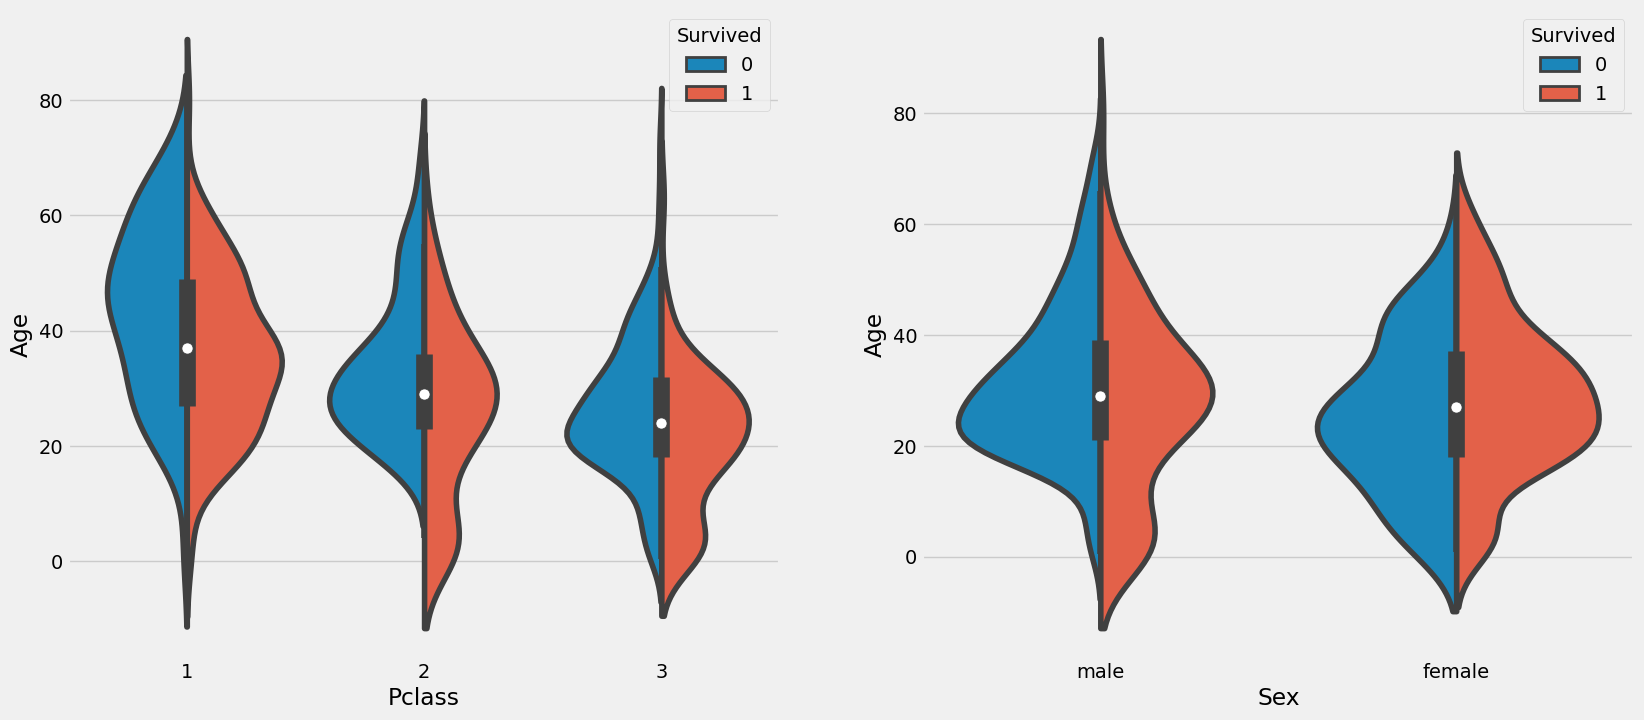

In [26]:
# 성별, 나이별 생존 확률 분포
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=ax[0])
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, ax=ax[1])

- 아동의 수는 등급이 낮아질 수록 많다.
- 10세 이하의 탑승객의 생존비율이 높다.
- 20-50대의 1등급 탑승객의 생존비율이 높다.

#### 03-04. Embarked 에 따른 생존 확률 확인하기

In [33]:
#탑승구별 생존 여부 확인하기
df[['Embarked','Survived']].groupby('Embarked').value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

Text(0.5, 1.0, 'Embarked vs Pclass')

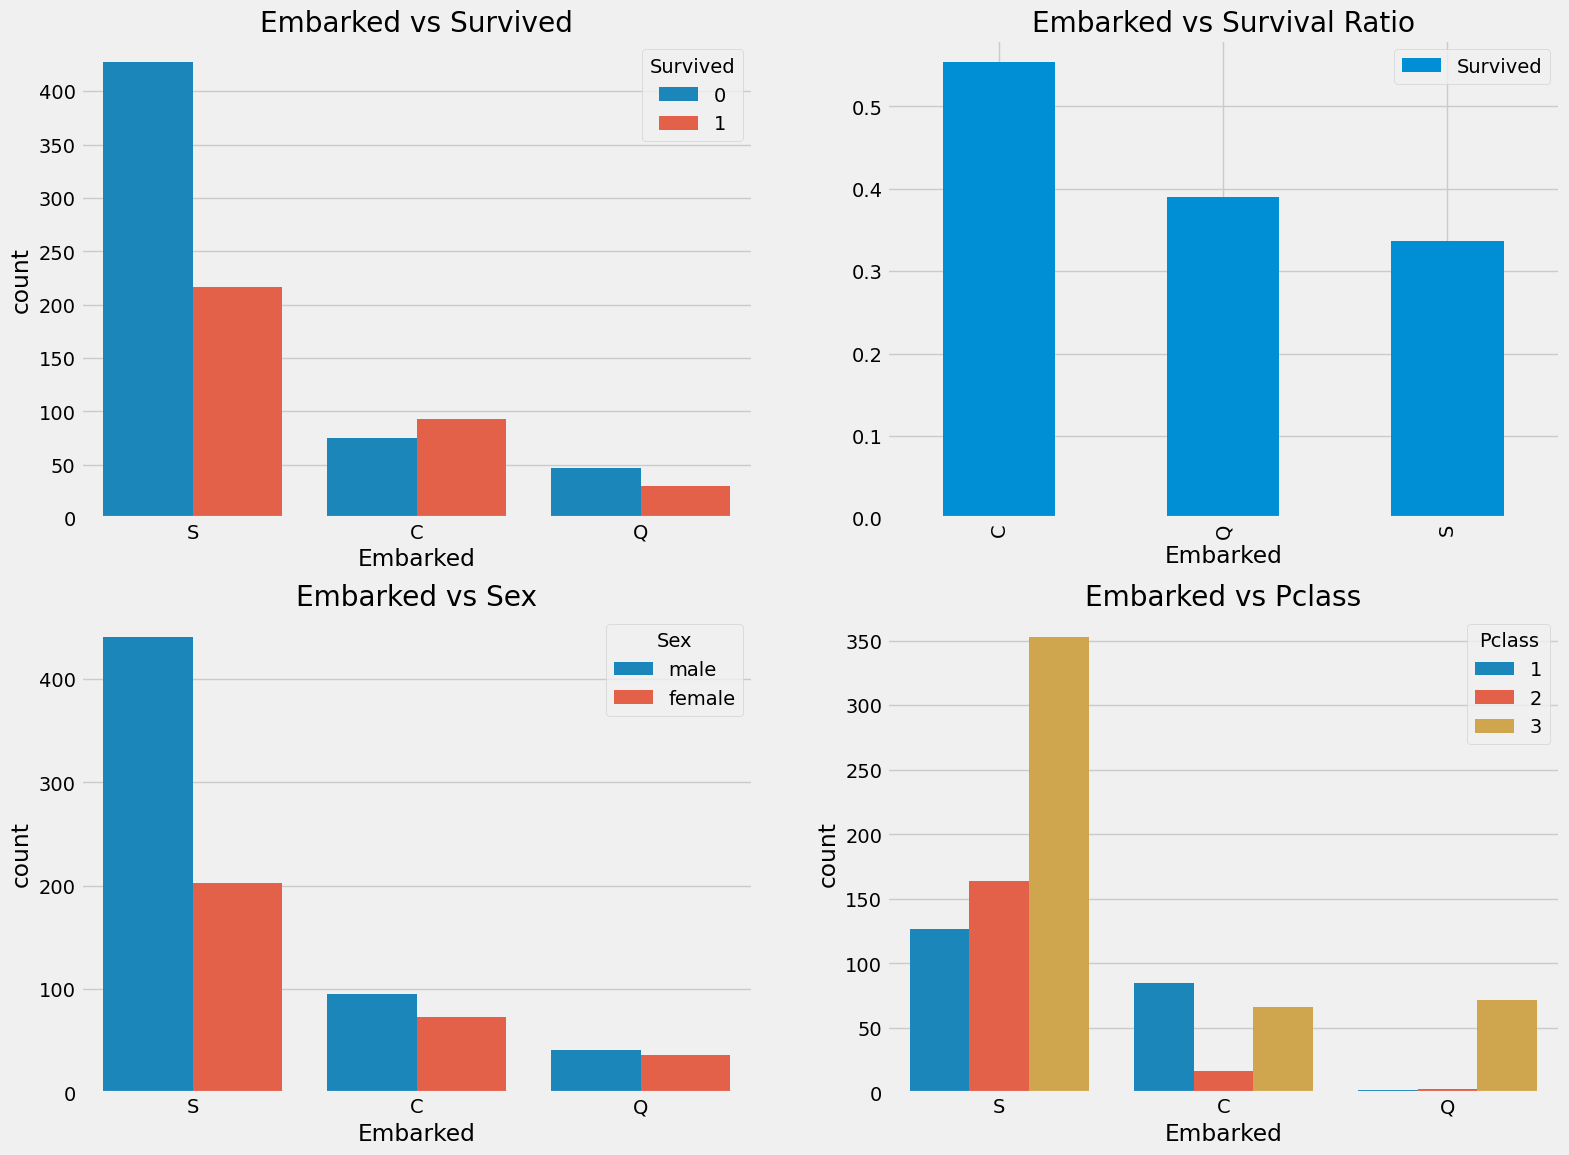

In [34]:
f, ax = plt.subplots(2, 2, figsize=(17, 13))

#countplot으로 탑승구별 생존여부 확인하기
sns.countplot(data=df, x='Embarked', hue='Survived', ax=ax[0, 0])
ax[0,0].set_title('Embarked vs Survived')

# 탑승구별 평균 생존 확률 확인
df[['Embarked', 'Survived']].groupby('Embarked').mean().plot.bar(ax=ax[0,1])
ax[0,1].set_title('Embarked vs Survival Ratio')

# 탑승구별, 성별 탑승객 확인
sns.countplot(data=df, x='Embarked', hue='Sex', ax=ax[1, 0])
ax[1,0].set_title('Embarked vs Sex')

#탑승구별, 등급별 탑승객 확인
sns.countplot(data=df, x='Embarked', hue='Pclass', ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')


- C 탑승구에서 탄 탑승객의 평균 생존확률이 높고, S등급에서 탄 탑승객의 평균 생존확률이 낮다.
- C 탑승구에서 탄 탑승객 중 1등급 탑승객의 비율이 높다.
- S 탑승구에서 탄 탑승객 중 3등급 탑승객의 비율이 높다.

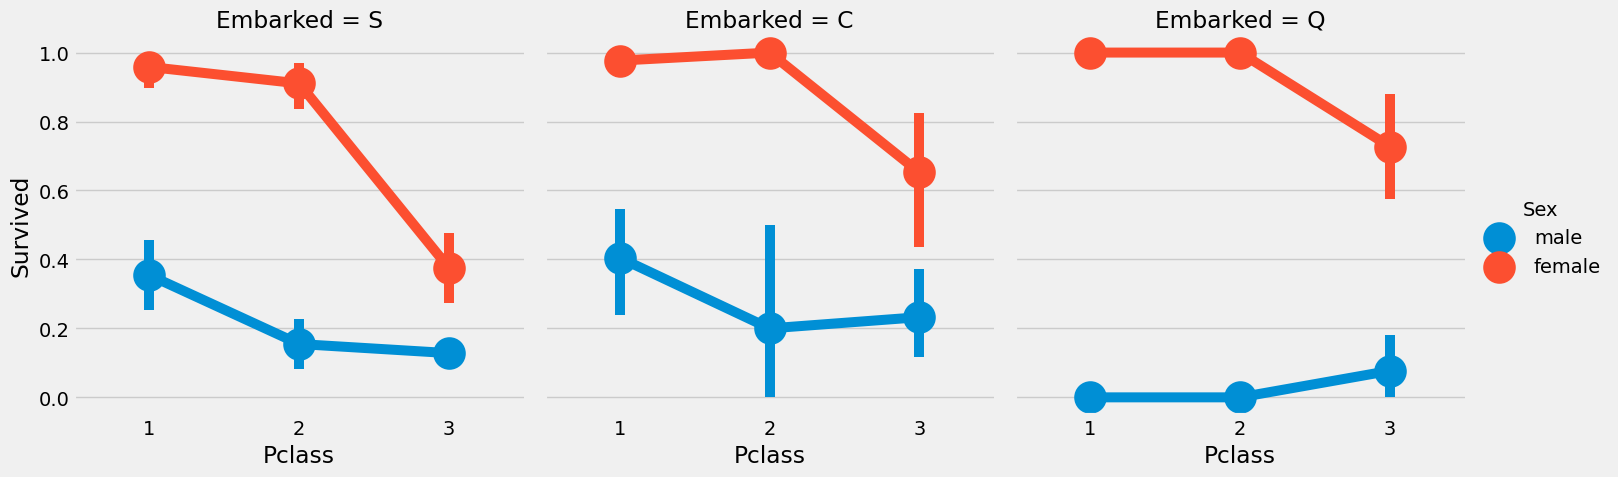

In [35]:
# catplot으로 성별, 등급별, 탑승구 별 생존 여부 확인하기
sns.catplot(data=df, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point')

- 1등급과 2등급의 여성 탑승객의 생존확률은 1에 근접한다.
- S 항구의 3등급 탑승객은 남성과 여성 모두 생존율이 낮다.
- Q 항구의 남성 탑승객 생존율은 매우 낮고, Q항구 탑승객의 대부분은 3등급 탑승객이다.

#### 03-05. Family 수로 생존여부 확인하기

- Family = SibSp + Parch + 1(본인)
- Family로 합쳐서 분석

In [36]:
# FamilySize 컬럼 생성
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df_test['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [37]:
# 최대, 최소 가족 규모 구하기
print('Maximum size of Family : ', df['FamilySize'].max())
print('Minimum size of Family : ', df['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


In [38]:
df['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

Text(0.5, 1.0, 'FamilySize vs Survived')

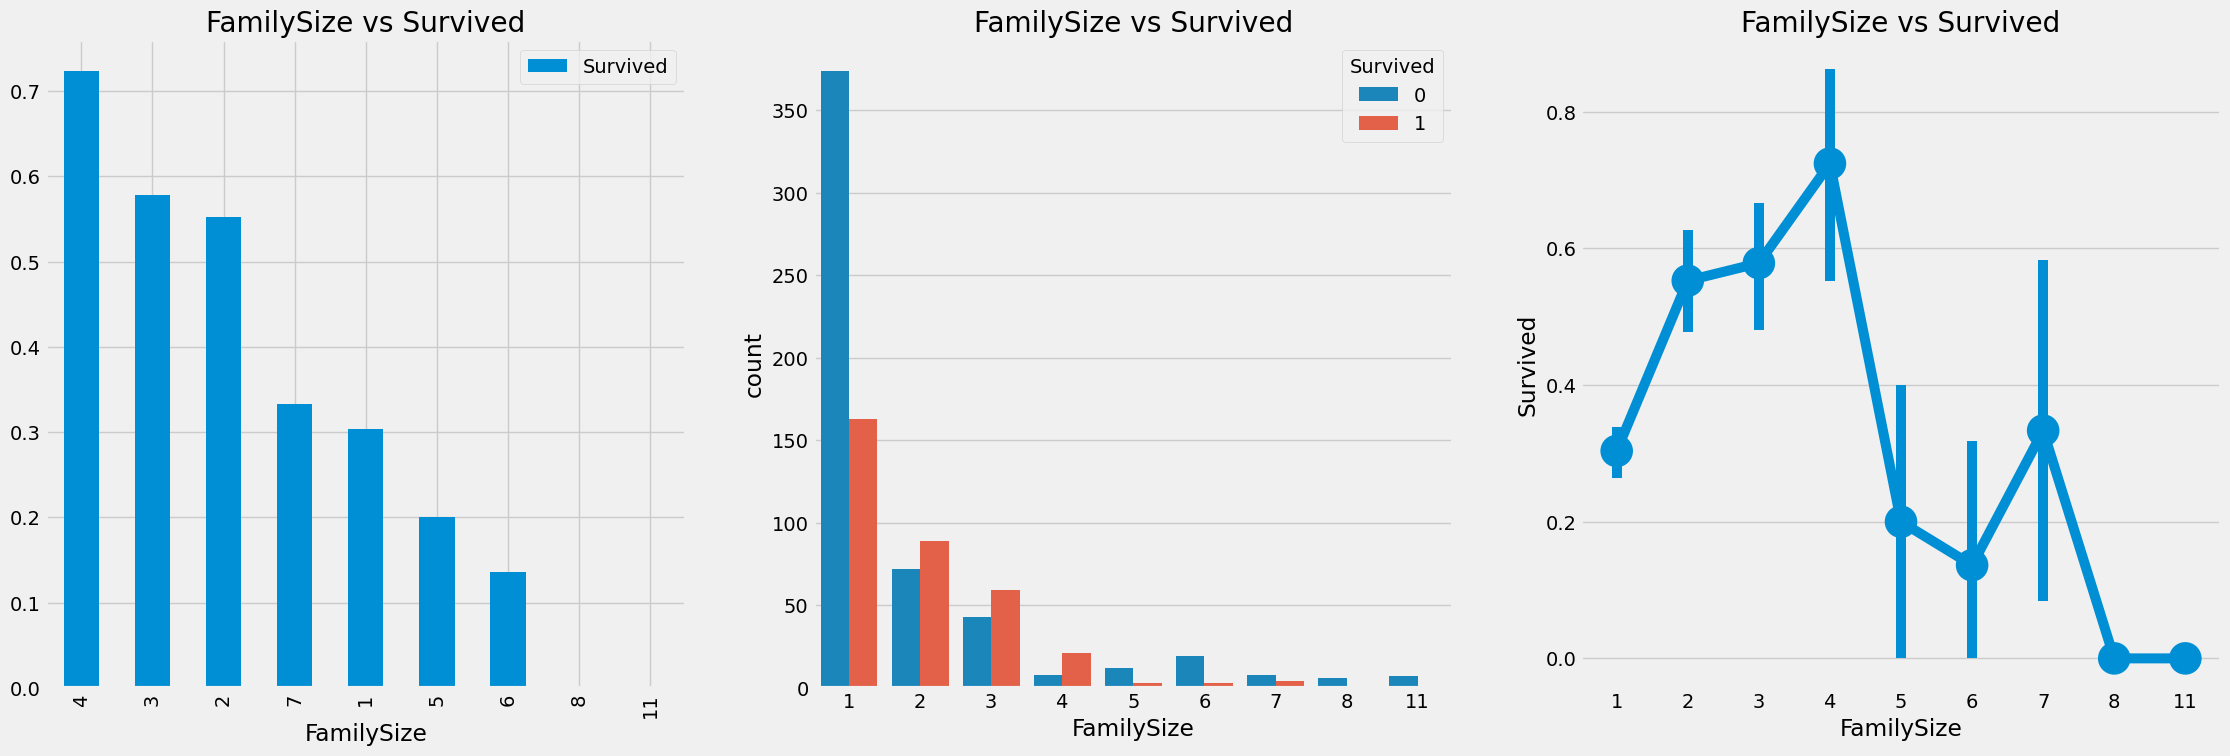

In [39]:
f, ax = plt.subplots(1, 3, figsize=(25, 8))

# 막대 그래프로 가족 규모 별 생존 확률 확인
df[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[0])
ax[0].set_title('FamilySize vs Survived')

# 막대 그래프로 가족 규모 별 생존 여부 확인
sns.countplot(data=df, x='FamilySize', hue='Survived', ax=ax[1])
ax[1].set_title('FamilySize vs Survived')

# pointplot으로 가족 규모 별 생존 확률 확인
sns.pointplot(data=df, x='FamilySize', y='Survived', ax=ax[2])
ax[2].set_title('FamilySize vs Survived')


- 2-3명의 가족 규모에서 가장 높은 생존 확률을 보인다.

In [40]:
# crosstab으로 가족 규모 별 탑승 등급 확인
pd.crosstab(df['FamilySize'], df['Pclass']).style.background_gradient('summer_r')

Pclass,1,2,3
FamilySize,,,
1,109,104,324
2,70,34,57
3,24,31,47
4,7,13,9
5,2,1,12
6,4,1,17
7,0,0,12
8,0,0,6
11,0,0,7


- 가족 규모가 큰 탑승객(7~11명) 은 3등급 탑승객이다.
- 혼자인 탑승객의 수가 가장 많다.
- 2명 탑승객 중 1등급 탑승객이 많고, 3명 탑승객은 3등급, 4명 탑승객은 2등급 탑승객이 가장 많다.

#### 03-06. Fare별 생존 여부 확인(Continuous Feature)
- sns.distplot : histplot과 displot으로 대체됨. histplot과 density curve 함께 분포확인 가능
- .skew() : 비대칭도. 평균에 대해 최빈값이 얼마나 치우쳐져 있는 나타내는 척도

In [41]:
# Fare 최댓값, 최솟값 확인
print('The Highest Fare was : ', df['Fare'].max())
print('The Lowest Fare was : ', df['Fare'].min())
print('The Average Fare was : ', df['Fare'].mean())

The Highest Fare was :  512.3292
The Lowest Fare was :  0.0
The Average Fare was :  32.204207968574636


<Axes: xlabel='Fare', ylabel='Density'>

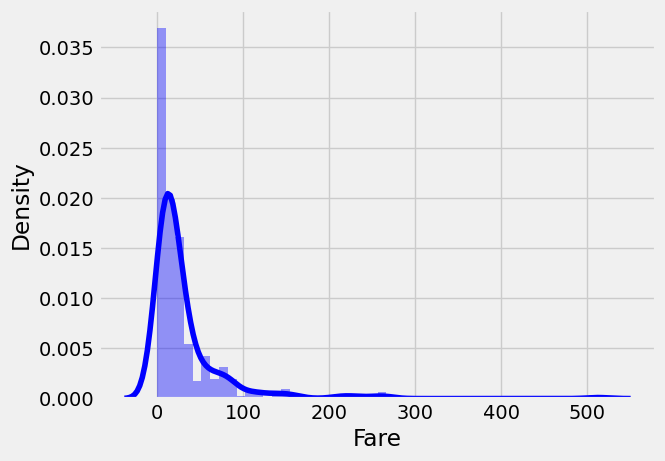

In [42]:
# distplot으로 Fare  컬럼의 skewness 확인
sns.distplot(df['Fare'], color ='b')

Text(0.5, 1.0, 'Fares in Pclass 3')

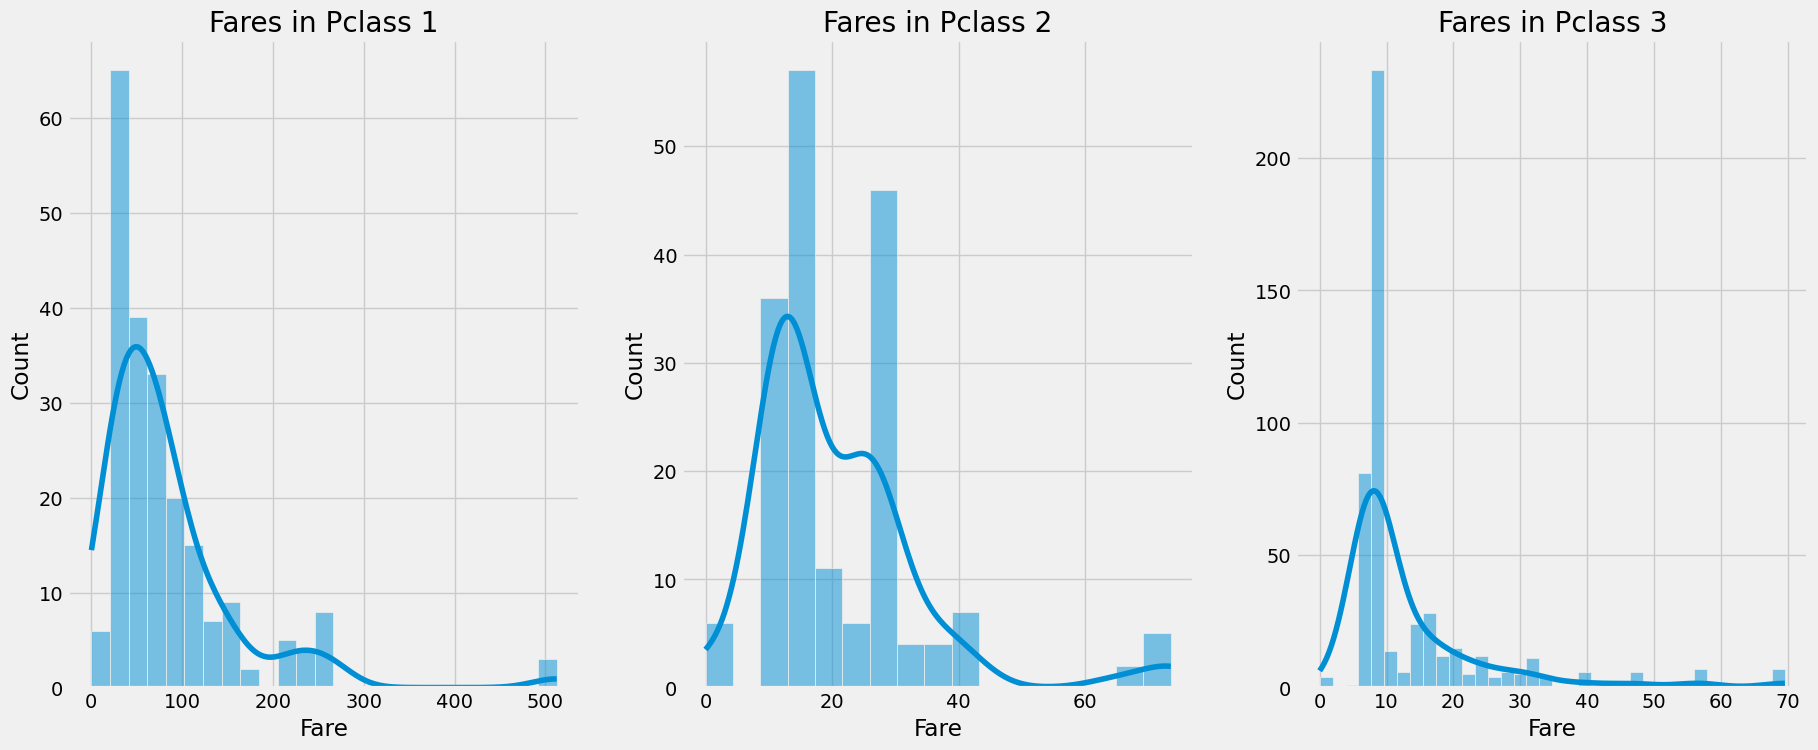

In [43]:
# 등급별 Fare 분포 확인
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.histplot(x=df[df['Pclass']==1]['Fare'], data=df, ax=ax[0], kde=True)
ax[0].set_title('Fares in Pclass 1')

sns.histplot(x=df[df['Pclass']==2]['Fare'], data=df, ax=ax[1], kde=True)
ax[1].set_title('Fares in Pclass 2')

sns.histplot(x=df[df['Pclass']==3]['Fare'], data=df, ax=ax[2], kde=True)
ax[2].set_title('Fares in Pclass 3')

- 1등급에서 가격의 차이가 큰 것을 확인할 수 있다.

#### Inital값 채우기

In [44]:
df['Initial'] = 0
for i in df:
    df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')

In [45]:
pd.crosstab(df.Initial, df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [46]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

In [47]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### 04. Nan값 처리

### Filling Nan Age

In [48]:
# 평균값으로 나이 채우기
df.loc[(df.Age.isnull())&(df.Initial=='Mr'), 'Age'] = 33
df.loc[(df.Age.isnull())&(df.Initial=='Mrs'), 'Age'] = 36
df.loc[(df.Age.isnull())&(df.Initial=='Master'), 'Age'] = 5
df.loc[(df.Age.isnull())&(df.Initial=='Miss'), 'Age'] = 22
df.loc[(df.Age.isnull())&(df.Initial=='Other'), 'Age'] = 46

In [49]:
df.Age.isnull().any()

False

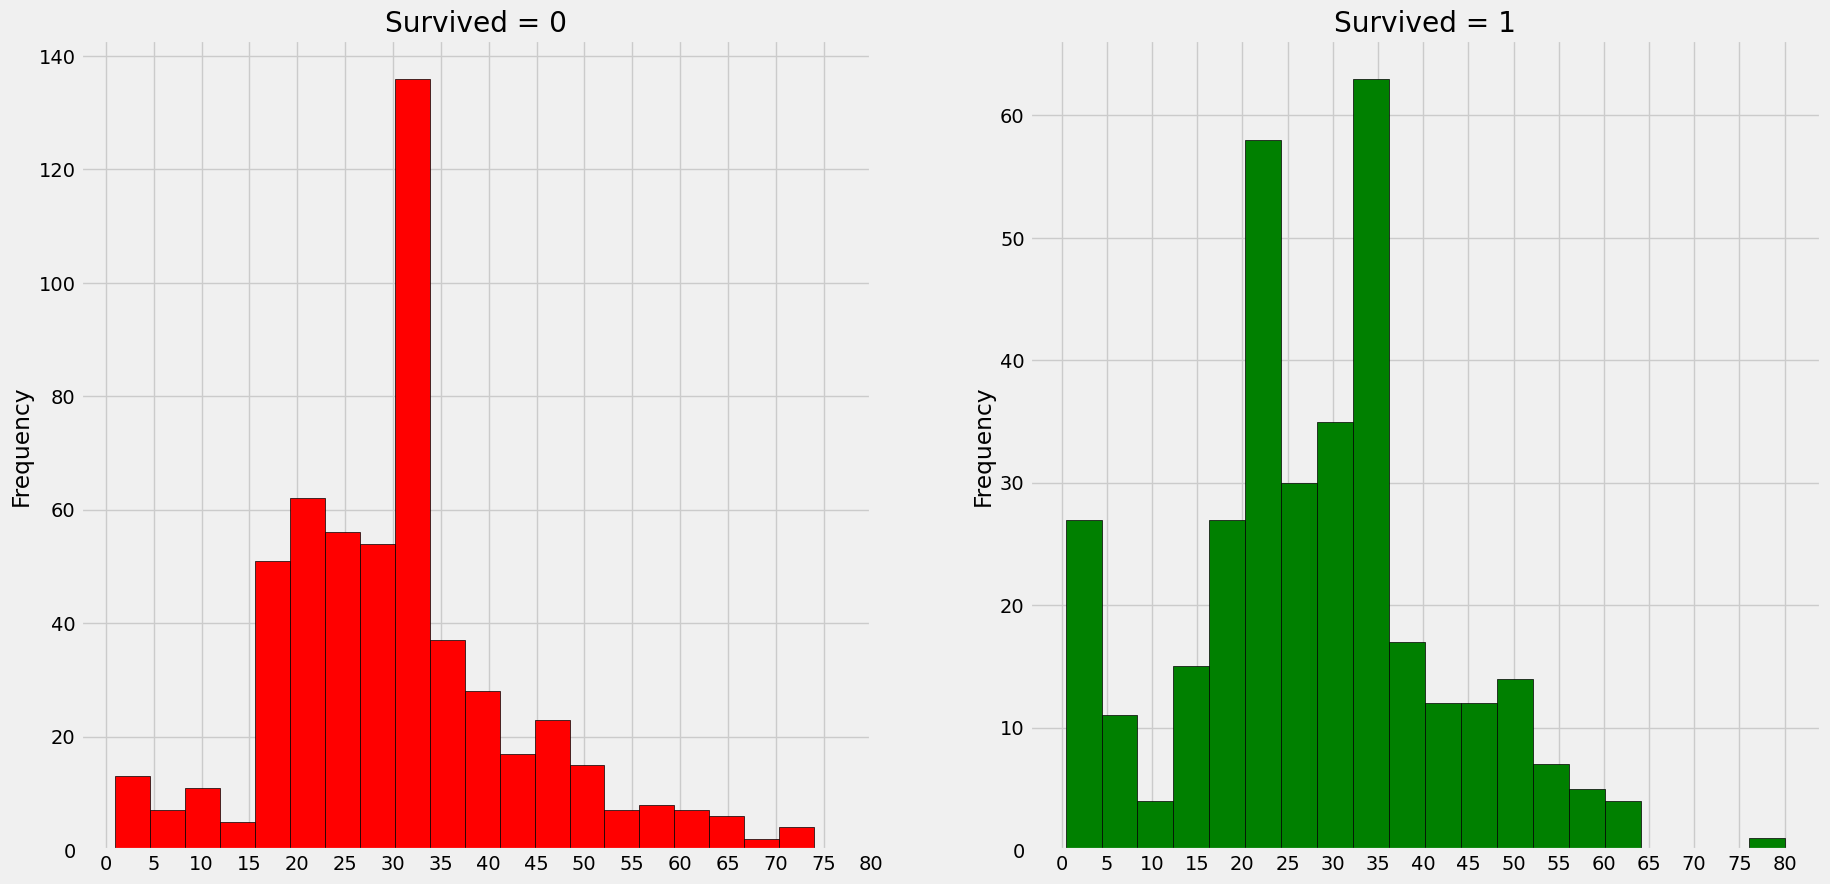

In [50]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red') # Survived=0 인 사람의 나이 분포
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5)) # x축 범위 지정
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')  # Survived=1 인 사람의 나이 분포
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

1 ) 5세 이하의 아이들은 많은 수로 생존하였다.\
2) 가장 나이가 많은 사람은 생존하였다.\
3) 30-40 나이대에서 사망률이 가장 높다.

### Embarked 채우기

In [51]:
df['Embarked'].fillna('S', inplace=True)

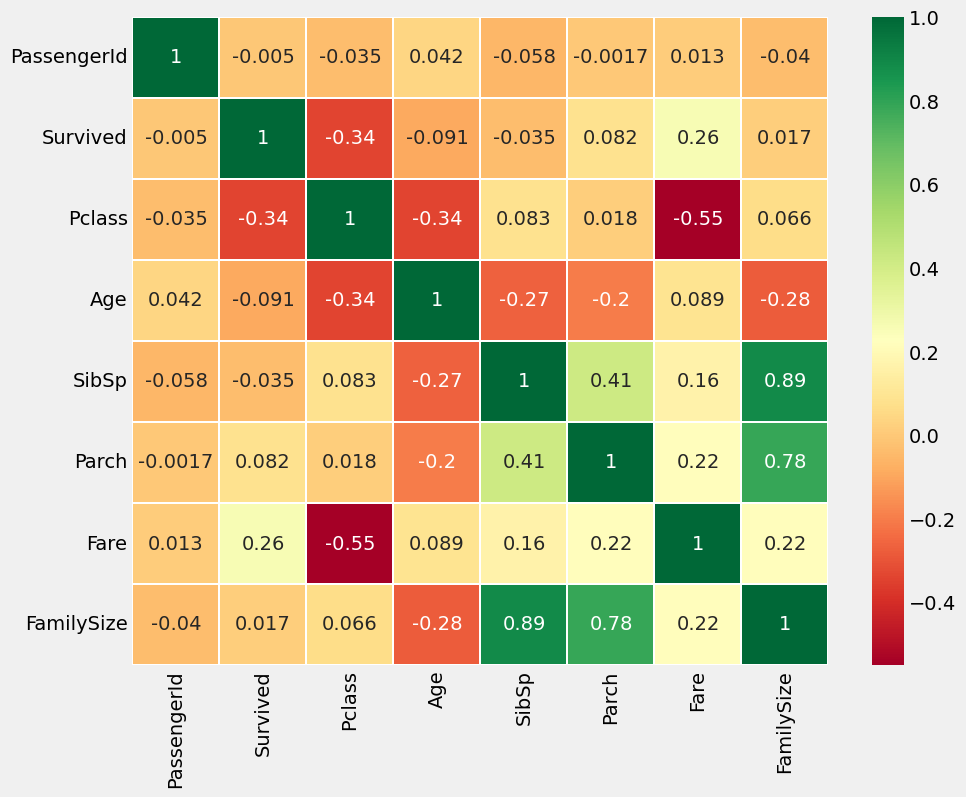

In [52]:
heatmap_data = df.select_dtypes(include='number') # value가 숫자인 컬럼만 불러오
sns.heatmap(heatmap_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Feature Engineering

### Age 나이대 구분하기

In [53]:
df['Age_band'] = 0
df.loc[df['Age'] <= 16, 'Age_band'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age_band'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age_band'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age_band'] = 3
df.loc[df['Age'] > 64, 'Age_band'] = 4

In [54]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


### Fare 구분하기

In [55]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- Fare값이 증가할 수록 생존률도 증가한다.

In [56]:
df['Fare_cat'] = 0
df.loc[df['Fare'] <= 7.91, 'Fare_cat'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare_cat'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare_cat'] = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 513), 'Fare_cat'] = 3

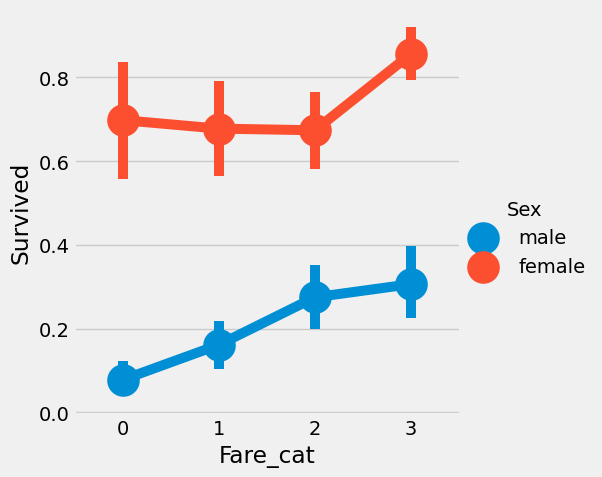

In [57]:
sns.catplot(x='Fare_cat', y='Survived', data=df, hue='Sex', kind = 'point')
plt.show()

### 문자값을 숫자값으로 바꾸기

In [58]:
# 성별, 탑승구, 이니셜
df['Sex'].replace(['male','female'],[0, 1], inplace=True)
df['Embarked'].replace(['S','C','Q'], [0, 1, 2], inplace=True)
df['Initial'].replace(['Mr','Mrs','Miss','Master','Other'], [0, 1, 2, 3, 4], inplace=True)

### 필요없는 컬럼 삭제
- 이름, 나이, 티켓, 요금, Cabin, Fare_Range, PassengerId

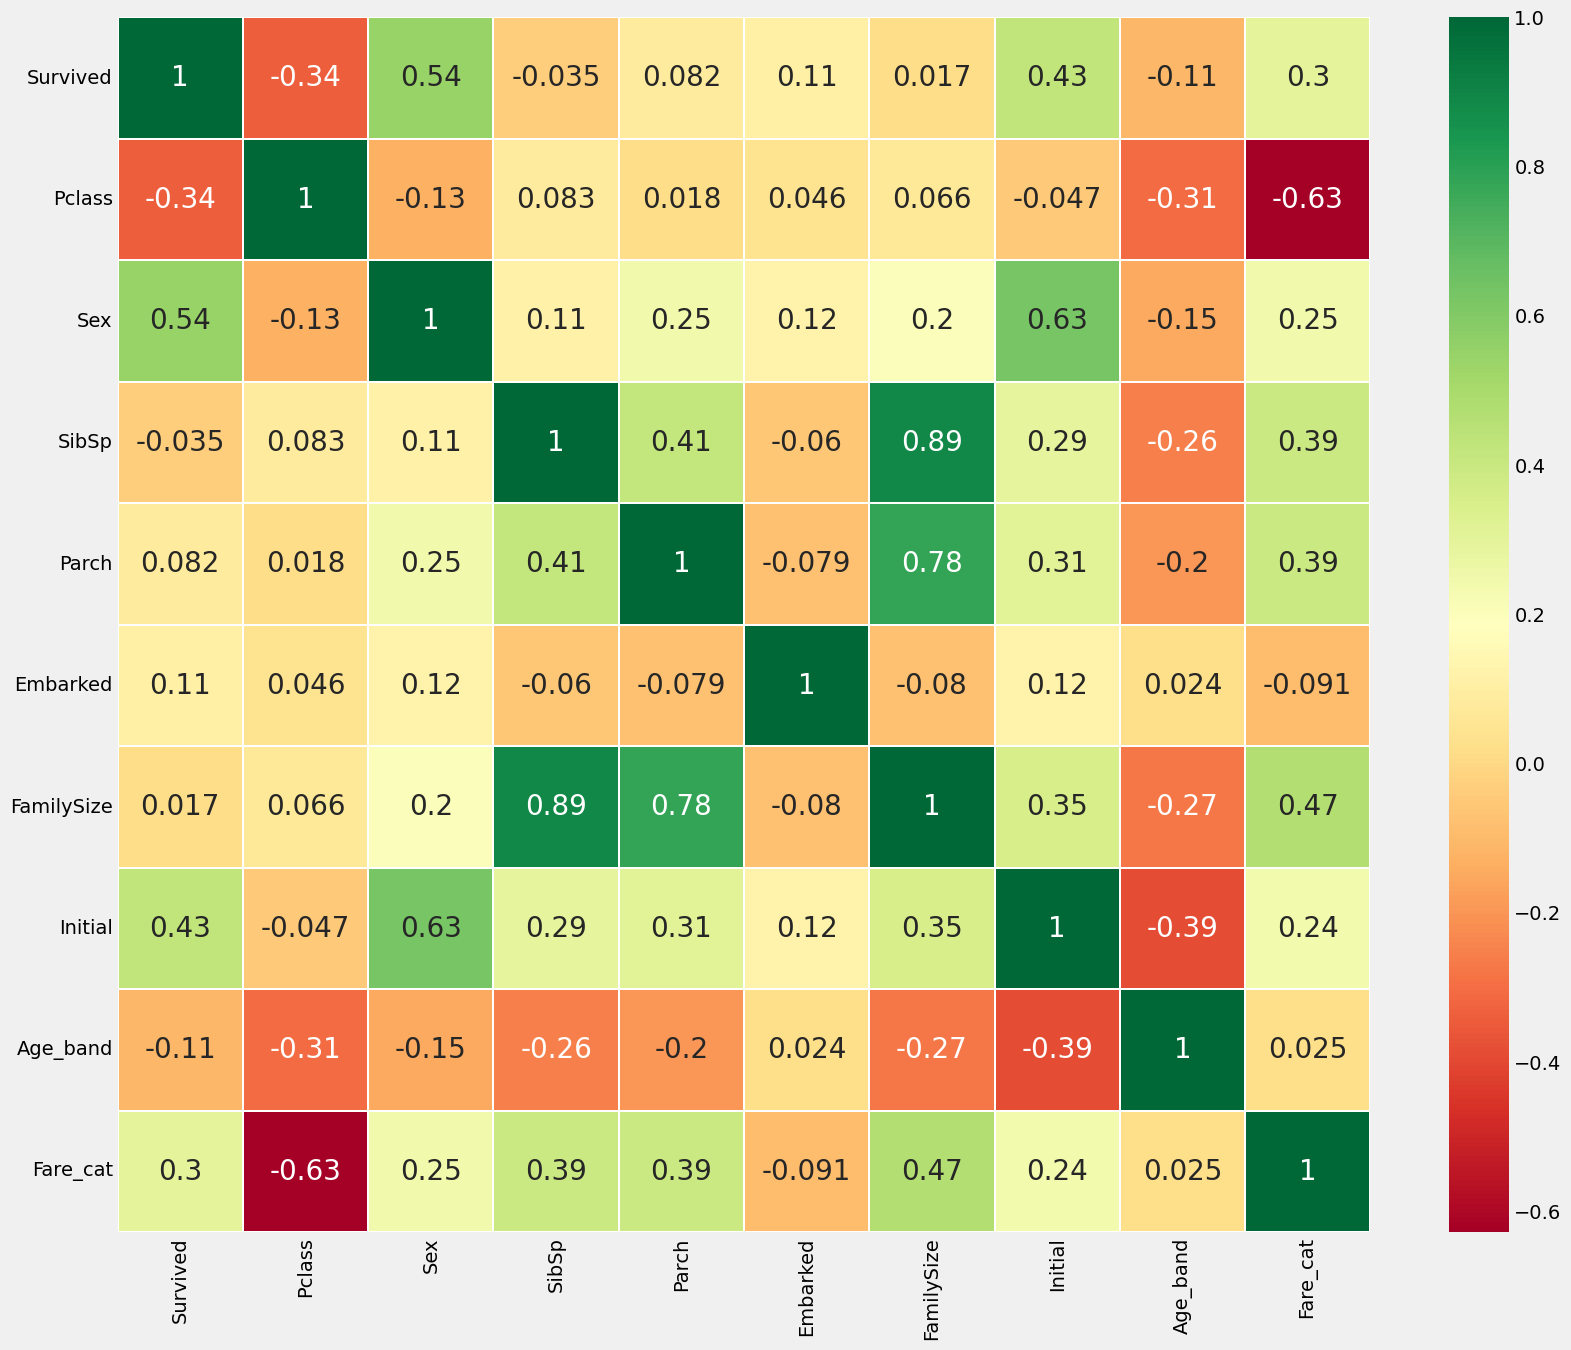

In [59]:
df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Predictive Modeling
1) Logistic Regression
2) Support Vector machines(Linear and radial)
3) Random Forest
4) K-Nearest Neighbours
5) Naive Bayes
6) Decision Tree
7) Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression # logistic Regression
from sklearn import svm # support vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split # training and test data split
from sklearn import metrics
from sklearn.metrics import confusion_matrix # for confusion matrix

In [61]:
train, test = train_test_split(df, test_size = 0.3, random_state = 0, stratify = df['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X=df[df.columns[1:]]
Y=df['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [62]:
model = svm.SVC(kernel='rbf', C=1, gamma =0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is : ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is :  0.835820895522388


### Linear Support Vector machine(linear-SVM)

In [63]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8059701492537313


### Logistic Regression

In [64]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is  0.8171641791044776


### Decision Tree

In [65]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


### K-Nearest Neighbours(KNN)

In [66]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8097014925373134


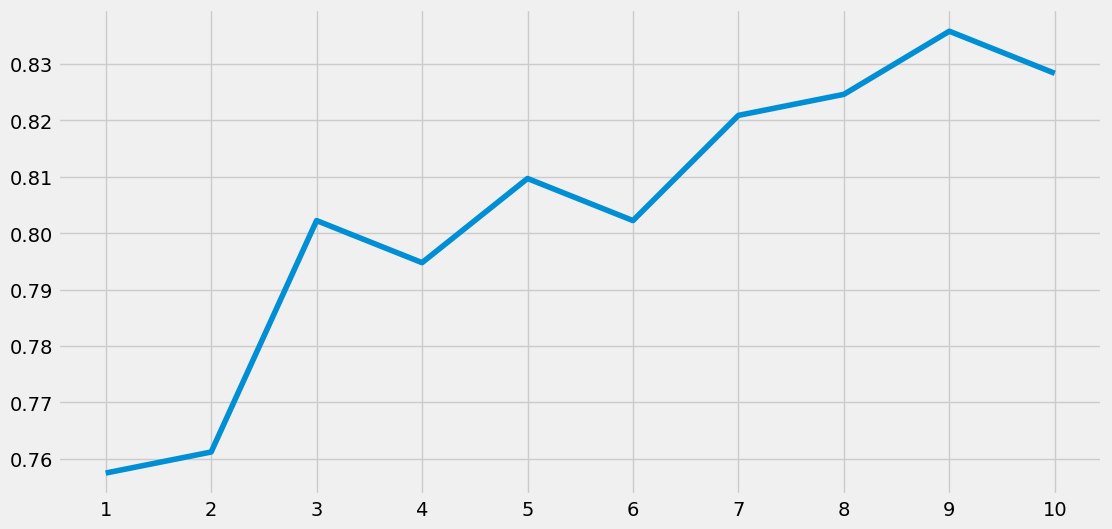

Accuracies for different values of n are :  [0.75746269 0.76119403 0.80223881 0.79477612 0.80970149 0.80223881
 0.82089552 0.82462687 0.8358209  0.82835821] with the max value as 0.835820895522388


In [67]:
a_index = list(range(1, 11))
a = pd.Series()
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = pd.concat([a, pd.Series(metrics.accuracy_score(prediction, test_Y))], ignore_index=True)
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are : ', a.values, 'with the max value as', a.values.max())

### Gaussian Naive Bayes

In [68]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8097014925373134


### RandomForests

In [69]:
model = RandomForestClassifier()
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8171641791044776


### Cross Validation
- 모델 변동성 : 훈련 및 테스트 데이터가 변하면 정확도도 변한다. 즉, 데이터 셋에따라 정확도가 증가하거나 감속할 수 있다.
- 교차 검증 : 모델 변동성을 극복하고 일반화된 모델을 얻기 위함. 훈련 및 테스트 데이터를 여러 번 반복적으로 나눈어 모델을 평가하는 기술. 교차 검증을 통해 모델이 다양한 데이터에 대해 얼마나 일반화되는지를 더 신뢰할 수 있게 평가할 수 있다.

1. K-Fold Cross Validation : 먼저 데이터셋을 k개의 하위 집합으로 나눔
2. 데이터셋을 (k=5)부분으로 나눈다면 1부분은 테스트를 위해 보류하고 4부분에서 알고리즘을 훈련
3. 다음 반복에서는 테스트 부분을 변경하고 다른 부분에서 알고리즘 훈련 진행. 정확도와 오류를 평균화하여 알고리즘의 평균 정확도를 얻을 수 있다.

- 알고리즘이 특정 훈련 데이터에 대해 과소적합 또는 다른 훈련 세트에 대해 데이터를 과적합할 수 있다. 교차 검증을 사용하면 일반화된 모델을 얻을 수 있다.

In [70]:
from sklearn.model_selection import KFold # for K-Fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction
kfold = KFold(n_splits=10, random_state= 22, shuffle=True)

xyz=[]
accuracy = []
std = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel = 'rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = 'accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.782360,0.058806
Radial Svm,0.828377,0.057096
Logistic Regression,0.801411,0.036139
KNN,0.809263,0.042580
Decision Tree,0.800237,0.046209
Naive Bayes,0.798102,0.052204
Random Forest,0.813745,0.043283


<Axes: >

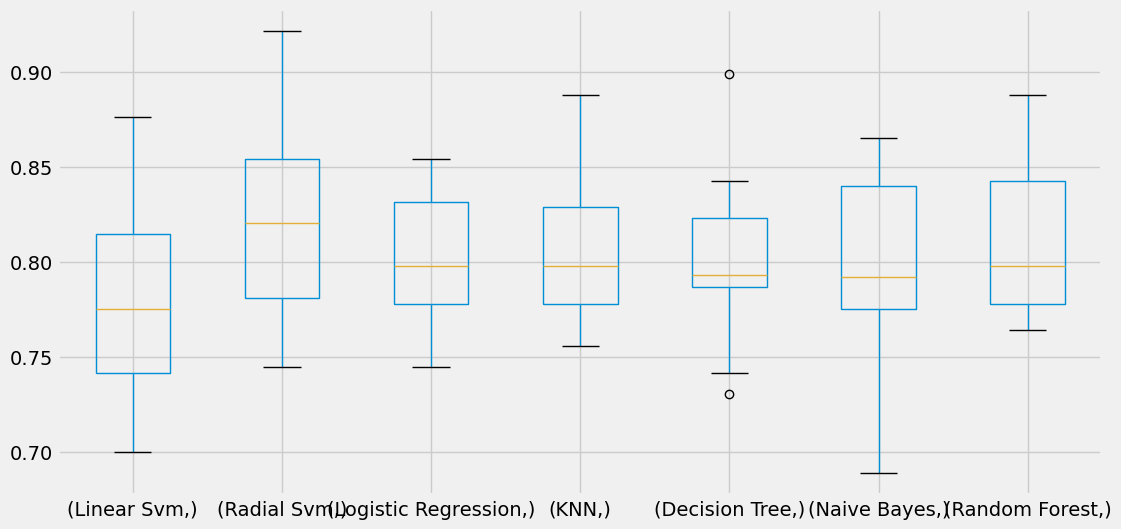

In [71]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

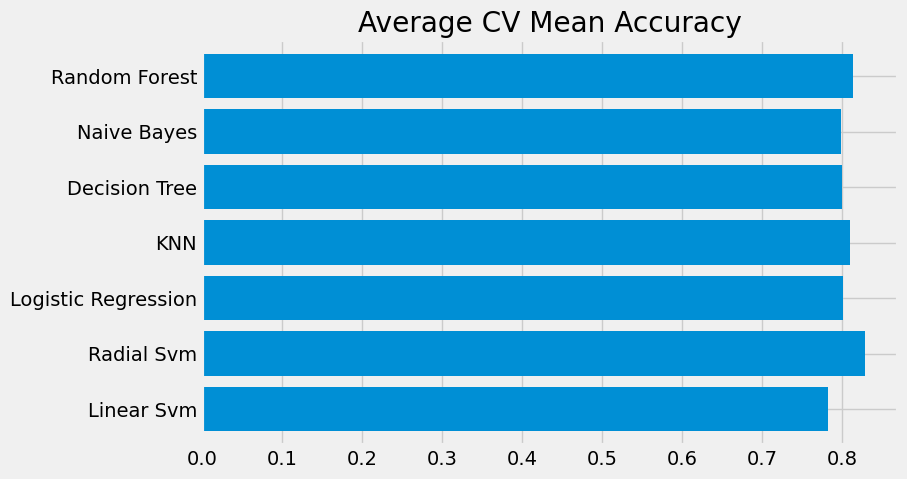

In [72]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

### Confusion Matrix

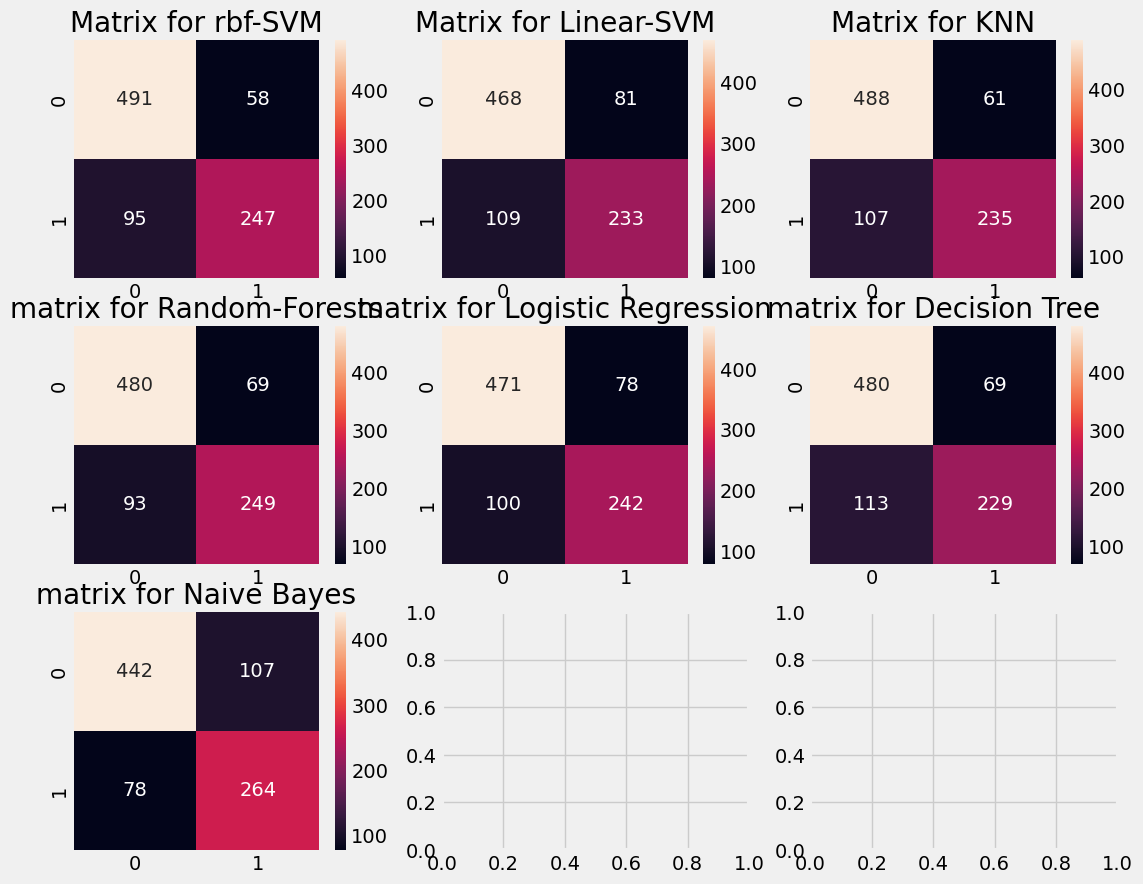

In [73]:
f, ax = plt.subplots(3, 3, figsize=(12, 10))
# rbf-SVM
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

# Linear-SVM
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

# KNN
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

# Random-Forests
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('matrix for Random-Forests')

# Logistic Regression
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('matrix for Logistic Regression')

# Decision Tree
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('matrix for Decision Tree')

# Naive Bayes
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

rbf-SVM : 491(for dead) + 247(for survived) / 891 = 82.8%
- 생존하지 못한 경우를 생존했다고 잘못 예측한 경우가 더 많다.
- rbf-SVM 생존하지 못한 경우를 가장 정확하게 예측/ Naive Bayes 생존한 경우를 가장 정확하게 예측 

### Hyper-Parameters Tuning

- Parameter values를 조정하거나 변경하여 더 나은 모델을 얻을 수 있음. SVM 및 RandomForests와 같은 분류기에 대하여 파라미터 튜닝 진행

### SVM
- GridSearchCV() : 그리드 서치 방법을 사용하여 모델의 최적 parameter value를 차즌ㄴ데 사용. 가능한 모든 조합을 사용하여 최적의 조합을 찾음.

In [74]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid = hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.6, gamma=0.1)


### Random Forest

In [75]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators' : n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8193270981106021
RandomForestClassifier(n_estimators=400, random_state=0)


- SVM 82.82%로 C=0.6, gamma=0.1 일 때 최고 점수이다.
- Random Forest 81.93%로 n_estimators=400일 때 최고 점수이다.

### Ensemble
1) Voting Classifier
2) Bagging
3) Boosting

### Voting Classifier
- 여러 개별 모델을 결합하여 더 강력한 모델을 만드는 기법.
  1) 다양한 분류기를 생성
  2) Voting Classifier에 포함시킴
  3) 각 분류기들의 예측을 조합하여 최종 예측을 수행.
     - hard :  각 분류기의 예측 결과를 단순히 다수결로 결정
     - soft : 각 분류기의 예측 확률을 평균하여 가장 높은 확률을 가진 클래스를 선택

In [76]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                   ('RBF',svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                   ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                   ('LR', LogisticRegression(C=0.05)),
                                   ('DT',DecisionTreeClassifier(random_state=0)),
                                   ('NB', GaussianNB()),
                                   ('svm', svm.SVC(kernel='linear',probability=True))], voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8282771535580524


### Bagging
- Decision Tree, Random Forest와 같이 분산이 높은 모델에서 가장 잘 작동한다. 

In [118]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=3), random_state = 0, n_estimators= 700)
model.fit(train_X, train_Y)
prediction= model.predict(test_X)
print('The accuracy for bagged KNN is', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring = 'accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


### Boosting
- 전체 데이터셋에 대해 모델을 학습함. 잘못 예측된 인스턴스에 더 높은 가중치를 부여.

In [131]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


In [135]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


### Confusion matrix for the Best Model

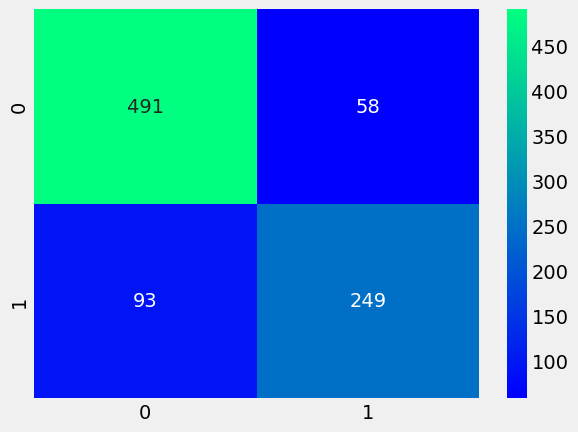

In [122]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result=cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance

<function matplotlib.pyplot.show(close=None, block=None)>

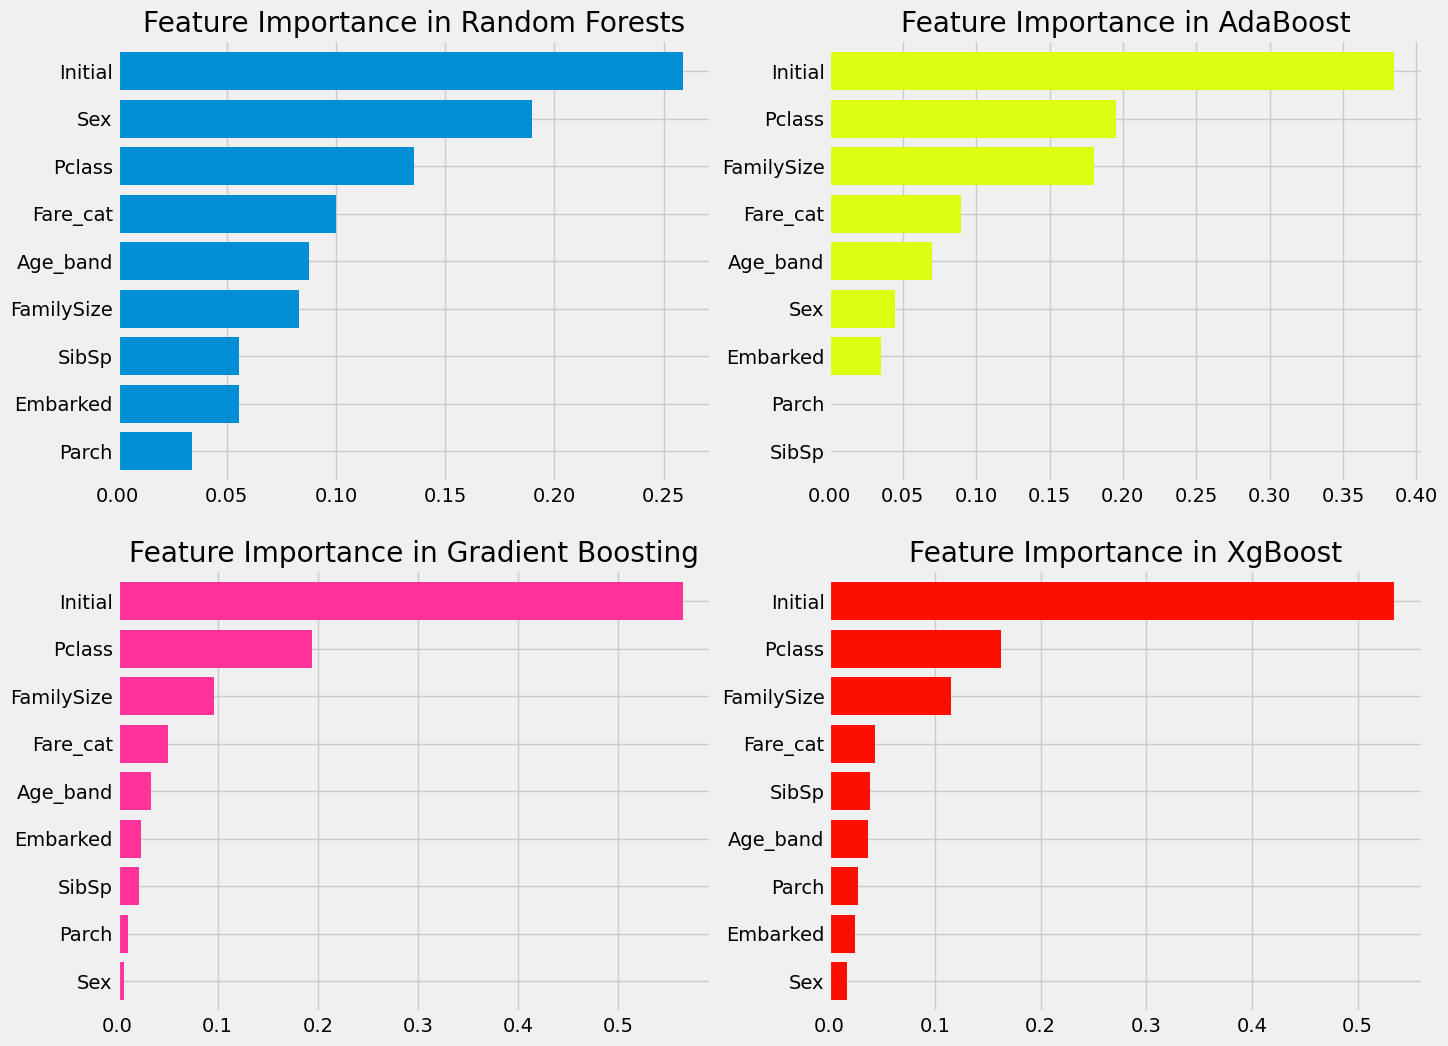

In [133]:
import xgboost as xg
from sklearn.ensemble import GradientBoostingClassifier
f, ax = plt.subplots(2, 2, figsize=(15, 12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 0])
ax[0, 0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0, 1], color='#ddff11')
ax[0, 1].set_title('Feature Importance in AdaBoost')

model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 0], color='#FF3399')
ax[1, 0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1, 1], color='#FD0F00')
ax[1, 1].set_title('Feature Importance in XgBoost')
plt.show

- 공통된 중요한 feature들을 확인할 수 있다. Initial, Pclass, Fare_cat
- Sex는 RandomForest에서만 중요함을 확인할 수 있다.